In [1]:
import pandas as pd


df = pd.read_csv('feature_extracted_plate.csv')
df = df.drop('Unnamed: 0', axis=1)
df.head()

,plate,date,price,price_Box-Cox,price_Yeo-Johnson,price_Quantile,price_log,plate_length,region,registration_code,...,series_part_2_YC,series_part_2_YE,series_part_2_YH,series_part_2_YK,series_part_2_YM,series_part_2_YO,series_part_2_YP,series_part_2_YT,series_part_2_YX,series_part_2_YY
0,X059CP797,2024-12-26 00:00:00,65000,-0.903094,-0.903096,-0.817902,11.082158,9,797,59,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Y800MH790,2024-07-12 21:31:37,100000,-0.440378,-0.440380,-0.370902,11.512935,9,790,800,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,A212TX77,2024-04-18 00:00:00,290000,0.532677,0.532678,0.468203,12.577640,8,77,212,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,P001AY199,2025-01-03 00:27:15,680000,1.196486,1.163831,1.149742,13.429850,9,199,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,B400BB750,2022-04-09 00:00:00,50000,-1.207010,-1.207011,-1.184447,10.819798,9,750,400,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
len(df['series'].unique())

1728

In [3]:
unique_series_sorted = sorted(df['series'].unique())
series2idx = {series: idx for idx, series in enumerate(unique_series_sorted)}

In [4]:
len(unique_series_sorted)

1728

In [5]:
df.columns[:48]

Index(['plate', 'date', 'price', 'price_Box-Cox', 'price_Yeo-Johnson',
       'price_Quantile', 'price_log', 'plate_length', 'region',
       'registration_code', 'series_part_1', 'series_part_2', 'series',
       'region_name', 'region_id_normal', 'region_id_Box-Cox',
       'region_id_Yeo-Johnson', 'region_id_Quantile', 'region_id_log',
       'region_avg_price', 'region_avg_Box-Cox', 'region_avg_Yeo-Johnson',
       'region_avg_Quantile', 'region_avg_log', 'digit_symmetry',
       'registration_symmetry', 'region_symmetry', 'digits_frequency',
       'region_frequency', 'registration_frequency', 'series_symmetry', 'year',
       'month', 'day', 'hour', 'day_of_week', 'is_prestigious_number',
       'is_prestigious_letter', 'series_part_1_A', 'series_part_1_B',
       'series_part_1_C', 'series_part_1_E', 'series_part_1_H',
       'series_part_1_K', 'series_part_1_M', 'series_part_1_O',
       'series_part_1_P', 'series_part_1_T'],
      dtype='object')

## Visualization
getting distribution for each of the characters for each index.

the problem is with different fold i have so much variance in the validation loss.

/var/folders/wy/xyqwny610cb9ft3dhglx4jyc0000gn/T/ipykernel_34326/1382160003.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(x=x_value-0.45, y=series_count_1.iloc[idx] + 0.001, s=round(mean_difference_1[idx], 3))
/var/folders/wy/xyqwny610cb9ft3dhglx4jyc0000gn/T/ipykernel_34326/1382160003.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(x=x_value+0.15, y=series_count_3.iloc[idx] + 0.001, s=round(mean_difference_3[idx], 3))


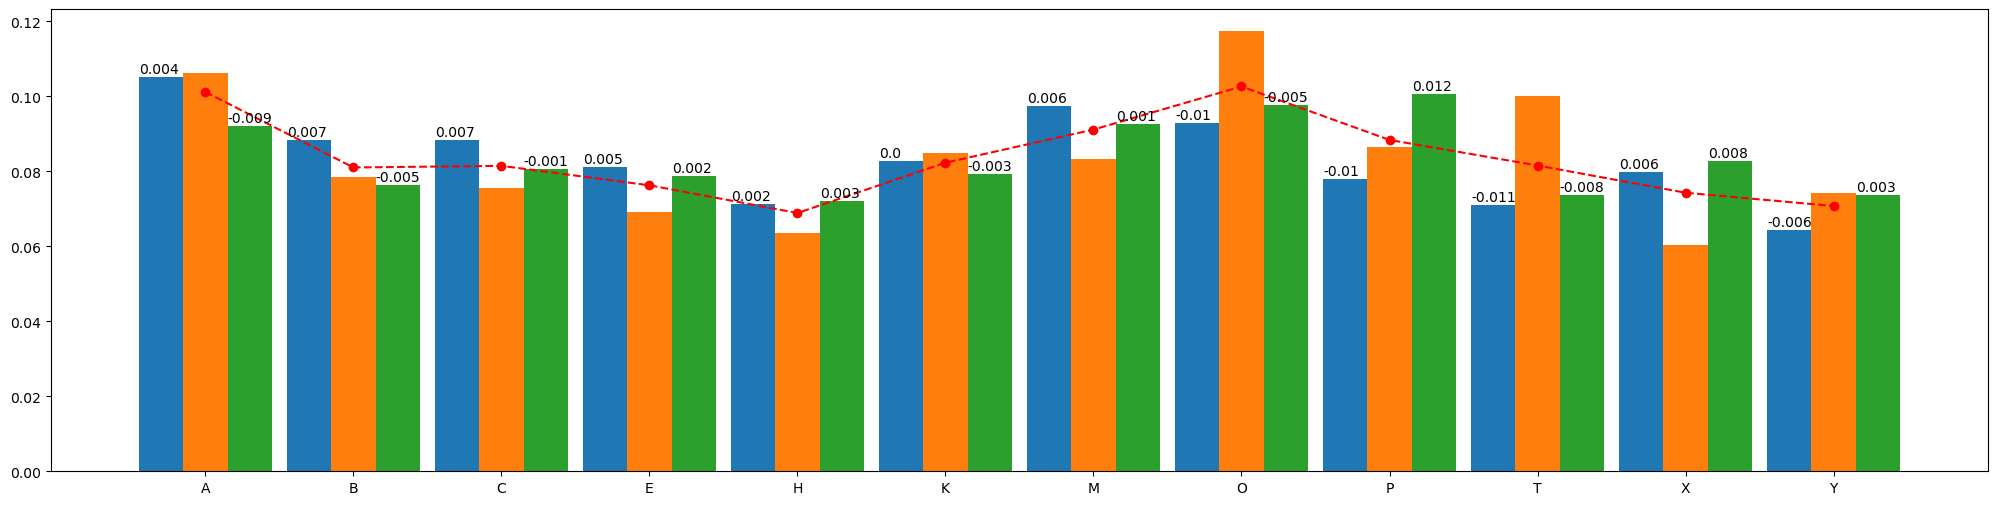

In [7]:
from matplotlib import pyplot as plt
import numpy as np

labels = ['A', 'B', 'C', 'E', 'H', 'K', 'M', 'O', 'P', 'T', 'X', 'Y']
series_count_1 = df['series'].str[0].value_counts(normalize=True).sort_index()
series_count_2 = df['series'].str[1].value_counts(normalize=True).sort_index()
series_count_3 = df['series'].str[2].value_counts(normalize=True).sort_index()

mean_count_char = pd.DataFrame({1: series_count_1, 2: series_count_2, 3: series_count_3}).T.mean().to_list()

x = np.arange(12)
width = 0.3

fig, ax = plt.subplots(figsize=(25, 6))


ax.bar(x-0.3, series_count_1, width)
ax.plot(x, mean_count_char, 'ro--')
ax.bar(x, series_count_2, width)
ax.bar(x+0.3, series_count_3, width)

mean_difference_1 = series_count_1 - mean_count_char
mean_difference_3 = series_count_3 - mean_count_char

for idx, x_value in enumerate(x):
    ax.text(x=x_value-0.45, y=series_count_1.iloc[idx] + 0.001, s=round(mean_difference_1[idx], 3))
    ax.text(x=x_value+0.15, y=series_count_3.iloc[idx] + 0.001, s=round(mean_difference_3[idx], 3))

        

ax.set_xticks(
    ticks=x,
    labels=labels
)

# Embedding layer training

In [9]:
char_plate = ['A', 'B', 'C', 'E', 'H', 'K', 'M', 'O', 'P', 'T', 'X', 'Y']
char2idx = {char: idx for idx, char in enumerate(char_plate)}
char2idx

{'A': 0,
 'B': 1,
 'C': 2,
 'E': 3,
 'H': 4,
 'K': 5,
 'M': 6,
 'O': 7,
 'P': 8,
 'T': 9,
 'X': 10,
 'Y': 11}

In [10]:
import torch
import torch.nn as nn


class Autoencoder(nn.Module):
    def __init__(self, dropout_rate=0.5):
        super(Autoencoder, self).__init__()

        self.encoder = nn.Sequential(
            nn.Linear(3, 8),
            # nn.ReLU(),
            nn.Linear(8, 16),
            # nn.ReLU(),
            nn.Linear(16, 32),
            nn.ReLU(),
            nn.Linear(32, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            #nn.Linear(128, 256),
            #nn.ReLU(),
        )

        self.decoder = nn.Sequential(
            #nn.Linear(256, 128),
            #nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            # nn.ReLU(),
            nn.Linear(8, 3),
            # nn.ReLU(),  
        )

    def forward(self, x):
        out = self.encoder(x)
        return self.decoder(out)

In [11]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, Subset
from sklearn.model_selection import KFold

class SeriesDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return torch.tensor([char2idx[char] for char in self.data[idx]], dtype=torch.float32)


dataset = SeriesDataset(unique_series_sorted)
batch_size = 16
k_folds = 12

kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

In [12]:
import torch
import torch.nn as nn

avg_freq = 1.0 / 12

weights_idx0 = [avg_freq / series_count_1[char] for char in char_plate]
weights_idx1 = [avg_freq / series_count_2[char] for char in char_plate]
weights_idx2 = [avg_freq / series_count_3[char] for char in char_plate]

weights_idx0 = torch.tensor(weights_idx0, dtype=torch.float32)
weights_idx1 = torch.tensor(weights_idx1, dtype=torch.float32)
weights_idx2 = torch.tensor(weights_idx2, dtype=torch.float32)

index_weights = [weights_idx0, weights_idx1, weights_idx2]


def weighted_mse_loss(outputs, targets, index_weights):
    batch_size, num_positions = outputs.shape
    total_loss = 0.0

    for pos in range(num_positions):
        t = targets[:, pos].long()
        weights = index_weights[pos][t]
        
        se = (outputs[:, pos] - targets[:, pos]) ** 2
        
        weighted_se = weights * se
        
        total_loss += weighted_se.sum()
    
    total_loss = total_loss / (batch_size * num_positions)
    return total_loss

In [23]:
class EarlyStopping:
    def __init__(self, fold_num, patience=5, delta=0.0):
        """
        Args:
            patience (int): How long to wait after last time validation loss improved.
            delta (float): Minimum change in the monitored quantity to qualify as an improvement.
        """
        self.patience = patience
        self.counter = 0
        self.best_loss = None
        self.early_stop = False
        self.delta = delta
        self.fold_num = fold_num

    def __call__(self, val_loss, model):
        if self.best_loss is None or val_loss < self.best_loss - self.delta:
            self.best_loss = val_loss
            self.counter = 0

        else:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
                path = f"{self.fold_num}_{val_loss}.pth"
                torch.save(model.state_dict(), path)

In [25]:
import torch.optim as optim

num_epochs = 300

# Optimal hyperparameters: lr=0.0001, epoch=500, kfolds=12, batchsize=128
# Better hyperparameter: le=0.0001, epoch=200, kfolds=12, batchsize=32 (with out relu for first and last layer in encoder and deocder)

all_train_losses = []
all_val_losses = []



for fold, (train_idx, val_idx) in enumerate(kf.split(dataset)):
    early_stopper = EarlyStopping(fold, patience=5, delta=0.0001)
    print(f'\n=== Fold {fold+1} ===')
    
    # Create subset loaders
    train_subset = Subset(dataset, train_idx)
    val_subset = Subset(dataset, val_idx)
    
    train_loader = DataLoader(train_subset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_subset, batch_size=batch_size, shuffle=False)
    
    # Initialize model, loss, optimizer (re-init for each fold)
    model = Autoencoder()
    #criterion = nn.MSELoss()
    
    optimizer = optim.Adam(model.parameters(), lr=0.00005)
    
    train_losses = []
    val_losses = []

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        for inputs in train_loader:
            targets = inputs.clone()
            outputs = model(inputs)
            #loss = criterion(outputs, targets)
            loss = weighted_mse_loss(outputs, targets, index_weights)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            train_loss += loss.item() * inputs.size(0)

        train_loss /= len(train_subset)
        train_losses.append(train_loss)

        # Validation
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs in val_loader:
                targets = inputs.clone()
                outputs = model(inputs)
                #loss = criterion(outputs, targets)
                loss = weighted_mse_loss(outputs, targets, index_weights)
                val_loss += loss.item() * inputs.size(0)

        val_loss /= len(val_subset)
        val_losses.append(val_loss)

        print(f"Epoch [{epoch+1}/{num_epochs}] Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}")
        
        early_stopper(val_loss, model)
        if early_stopper.early_stop:
            print(f"Early stopping triggered at epoch {epoch} with val loss: {val_loss}.")
            break

            
    all_train_losses.append(train_losses)
    all_val_losses.append(val_losses)


=== Fold 1 ===


/opt/anaconda3/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Epoch [1/300] Train Loss: 42.4203, Val Loss: 44.3452
Epoch [2/300] Train Loss: 42.1217, Val Loss: 43.8493
Epoch [3/300] Train Loss: 39.7486, Val Loss: 36.9357
Epoch [4/300] Train Loss: 24.2642, Val Loss: 15.6613
Epoch [5/300] Train Loss: 11.1241, Val Loss: 9.0795
Epoch [6/300] Train Loss: 8.4646, Val Loss: 8.2201
Epoch [7/300] Train Loss: 8.1881, Val Loss: 8.0037
Epoch [8/300] Train Loss: 8.0045, Val Loss: 7.8044
Epoch [9/300] Train Loss: 7.7709, Val Loss: 7.5262
Epoch [10/300] Train Loss: 7.3781, Val Loss: 7.0074
Epoch [11/300] Train Loss: 6.7215, Val Loss: 6.2259
Epoch [12/300] Train Loss: 5.7635, Val Loss: 5.1823
Epoch [13/300] Train Loss: 4.7251, Val Loss: 4.2960
Epoch [14/300] Train Loss: 3.9014, Val Loss: 3.5802
Epoch [15/300] Train Loss: 3.2312, Val Loss: 2.8728
Epoch [16/300] Train Loss: 2.3850, Val Loss: 1.8349
Epoch [17/300] Train Loss: 1.3201, Val Loss: 0.8253
Epoch [18/300] Train Loss: 0.6052, Val Loss: 0.3981
Epoch [19/300] Train Loss: 0.3433, Val Loss: 0.2642
Epoch [20/30

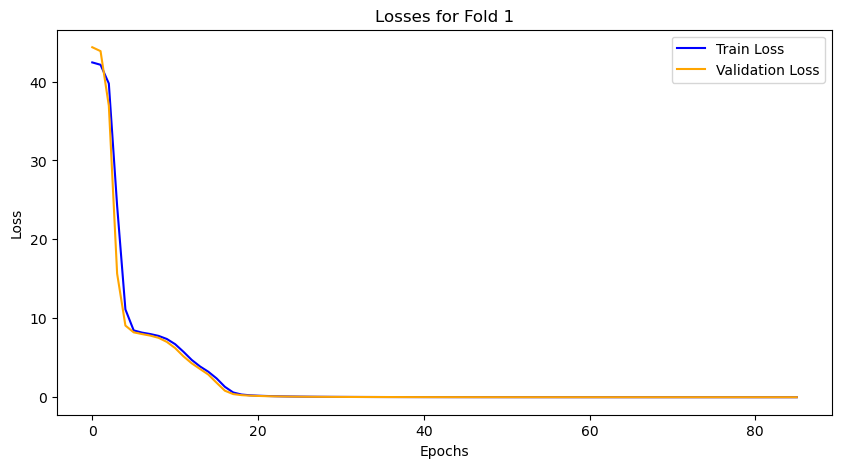

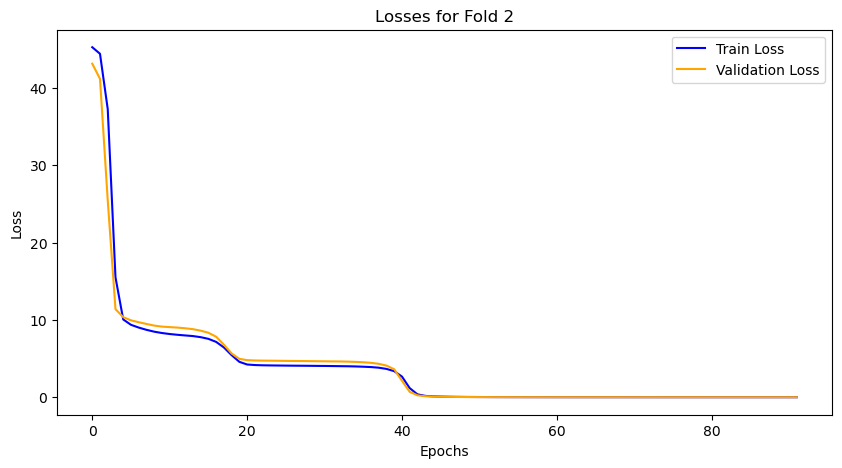

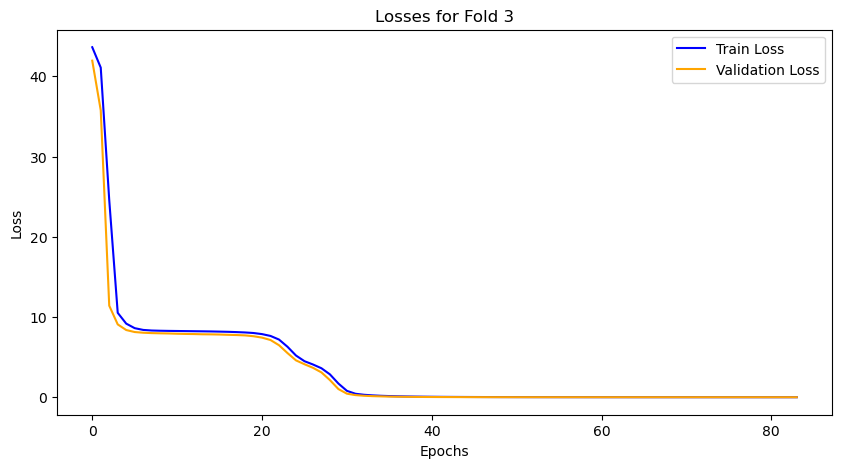

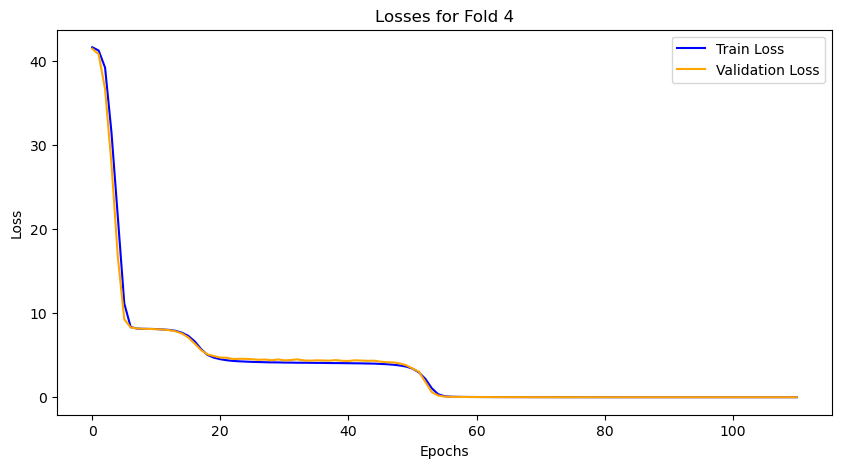

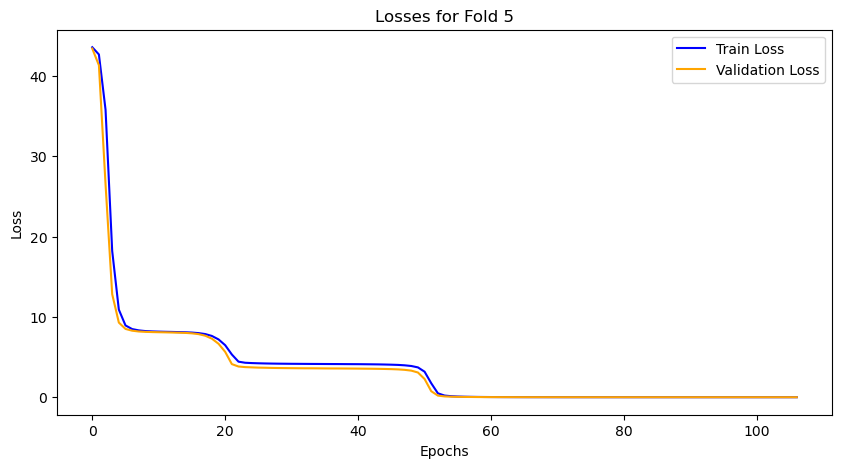

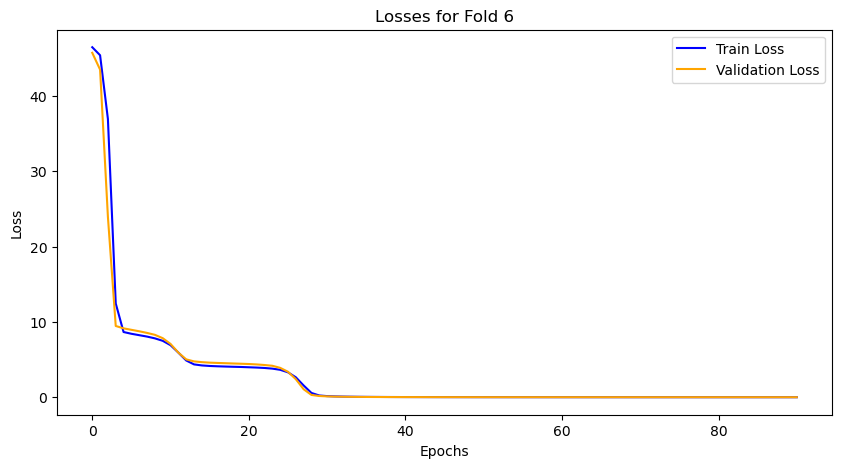

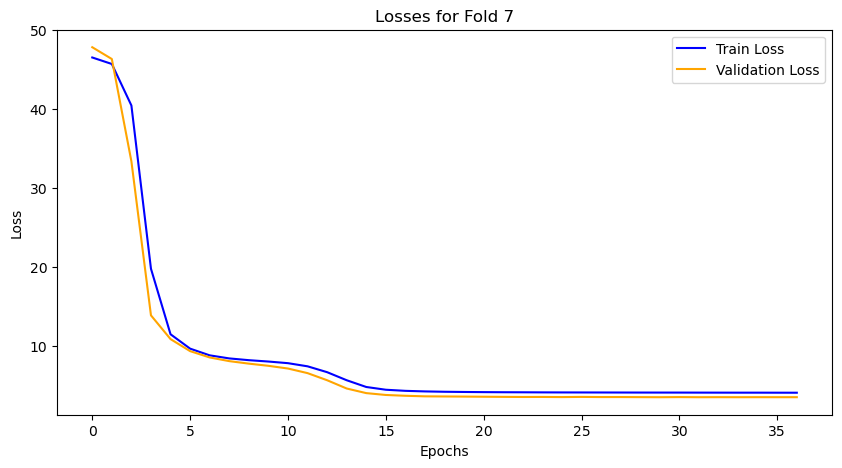

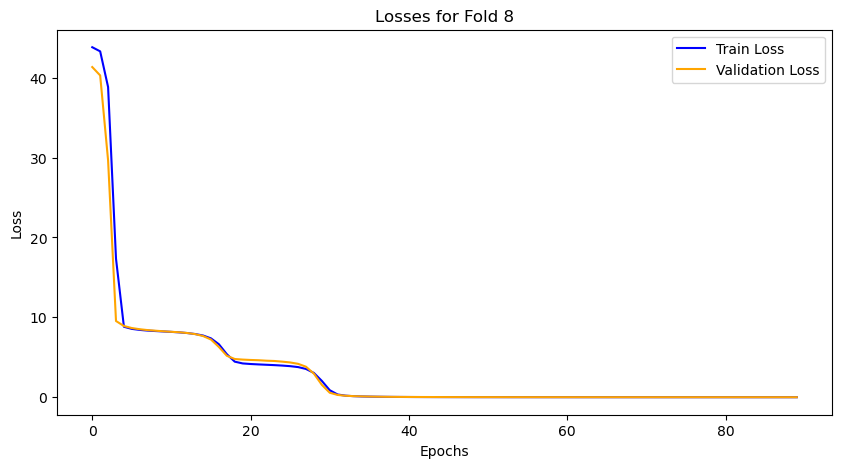

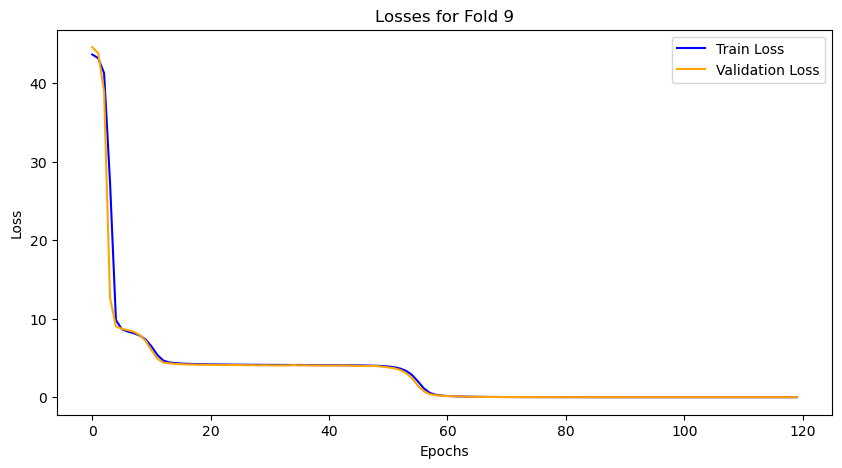

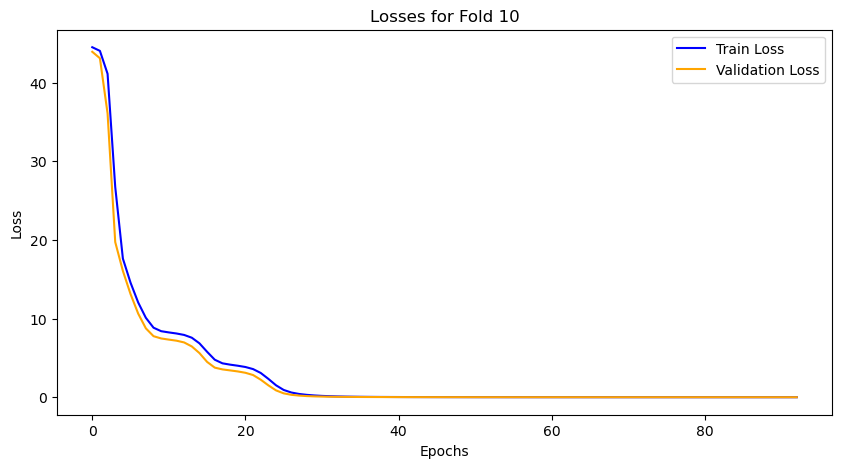

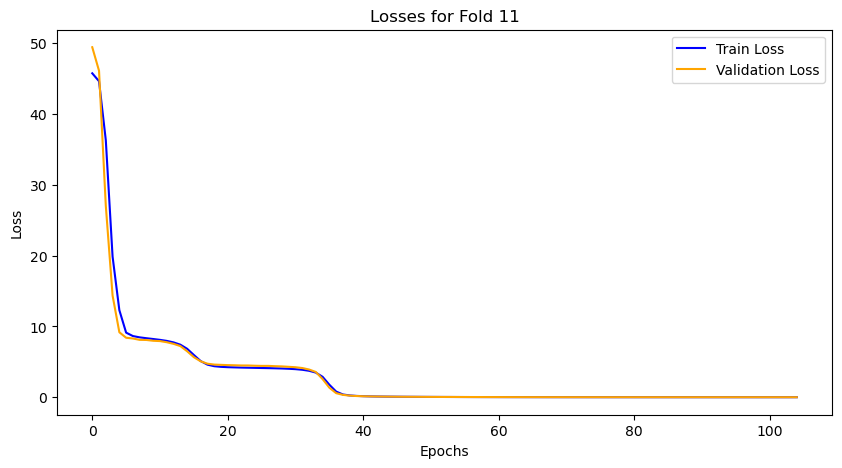

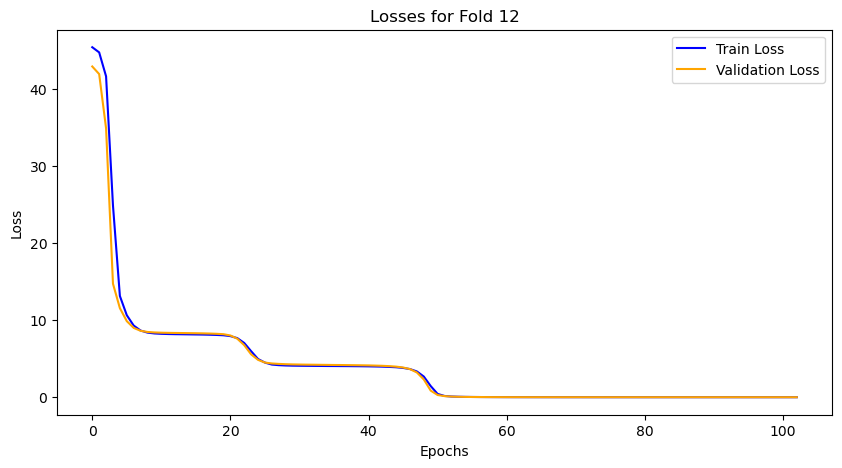

In [27]:
for fold in range(k_folds):
    plt.figure(figsize=(10, 5))
    plt.plot(all_train_losses[fold], label='Train Loss', color='blue')
    plt.plot(all_val_losses[fold], label='Validation Loss', color='orange')
    plt.title(f'Losses for Fold {fold + 1}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

In [29]:
input_tensor = torch.tensor([[char2idx[char] for char in 'YAA']], dtype=torch.float32)

output = model(input_tensor)
display(output)
display(torch.round(output).squeeze(0).detach().numpy())

tensor([[10.9243,  0.1705,  0.0716]], grad_fn=<AddmmBackward0>)

array([11.,  0.,  0.], dtype=float32)

In [31]:
model.eval()
idx2char = {v: k for k, v in char2idx.items()}
wrong_predictions = []

with torch.no_grad():
    for token in unique_series_sorted:
        input_tensor = torch.tensor([[char2idx[char] for char in token]], dtype=torch.float32)

        output = model(input_tensor)
        predicted_idxs = torch.round(output).squeeze(0).detach().numpy()
        predicted_token = ''.join(idx2char[i] for i in predicted_idxs)

        if predicted_token != token:
            print(f'token: {token}, predicted: {predicted_token}')